In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# Data Preprocessing
# Keep only important features
df = df[['location', 'total_sqft', 'bath', 'balcony', 'size', 'price']]

In [4]:
# Convert size to numerical values (extract BHK)
df['size'] = df['size'].str.split().str[0].astype(float)
df.rename(columns={'size': 'bhk'}, inplace=True)

In [5]:
# Handle missing values
df.dropna(inplace=True)

In [6]:
# Convert total_sqft to numerical values
def convert_sqft(x):
    try:
        return float(x)
    except:
        if '-' in x:
            split = x.split('-')
            return (float(split[0]) + float(split[1]))/2
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df.dropna(subset=['total_sqft'], inplace=True)

In [7]:
# Simplify locations (keep top 20 locations)
top_locations = df['location'].value_counts().head(20).index
df['location'] = df['location'].apply(lambda x: x if x in top_locations else 'Other')
df = pd.get_dummies(df, columns=['location'])

In [8]:
# Final cleaned dataset
print("\nCleaned dataset shape:", df.shape)
df.head()


Cleaned dataset shape: (12668, 26)


,total_sqft,bath,balcony,bhk,price,location_7th Phase JP Nagar,location_Bannerghatta Road,location_Bellandur,location_Chandapura,location_Electronic City,...,location_Kanakpura Road,location_Marathahalli,location_Other,location_Raja Rajeshwari Nagar,location_Rajaji Nagar,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka
0,1056.0,2.0,1.0,2.0,39.07,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,3.0,4.0,120.00,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,1440.0,2.0,3.0,3.0,62.00,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1521.0,3.0,1.0,3.0,95.00,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1200.0,2.0,1.0,2.0,51.00,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [9]:
# Split Data into Features and Target
X = df.drop('price', axis=1)
y = df['price']

In [10]:
# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (10134, 25)
Testing set shape: (2534, 25)


In [12]:
# Create and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

RMSE: 117.41
R-squared: 0.36


In [16]:
comparison = pd.DataFrame({
    'Actual Price': y_test.reset_index(drop=True),
    'Predicted Price': y_pred
})

# Display first 10 comparisons
print("First 10 predictions:")
display(comparison.head(10))

# Display last 10 comparisons
print("\nLast 10 predictions:")
display(comparison.tail(10))

First 10 predictions:


,Actual Price,Predicted Price
0,100.00,134.718507
1,65.00,52.223017
2,241.00,217.164129
3,120.00,143.663251
4,289.00,252.093126
5,113.00,142.223210
6,65.00,92.719662
7,68.00,63.288153
8,97.65,100.580868
9,36.00,65.798811



Last 10 predictions:


,Actual Price,Predicted Price
2524,70.00,104.719875
2525,69.00,54.576119
2526,40.00,11.855615
2527,59.00,83.135729
2528,35.00,53.395907
2529,43.55,70.058939
2530,74.00,128.085650
2531,110.00,152.837532
2532,500.00,184.068770
2533,65.00,55.301592


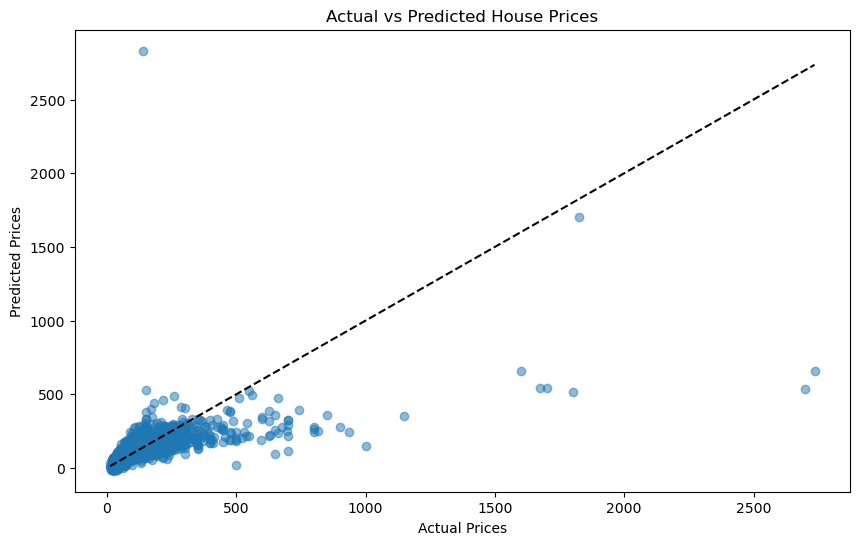

In [13]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


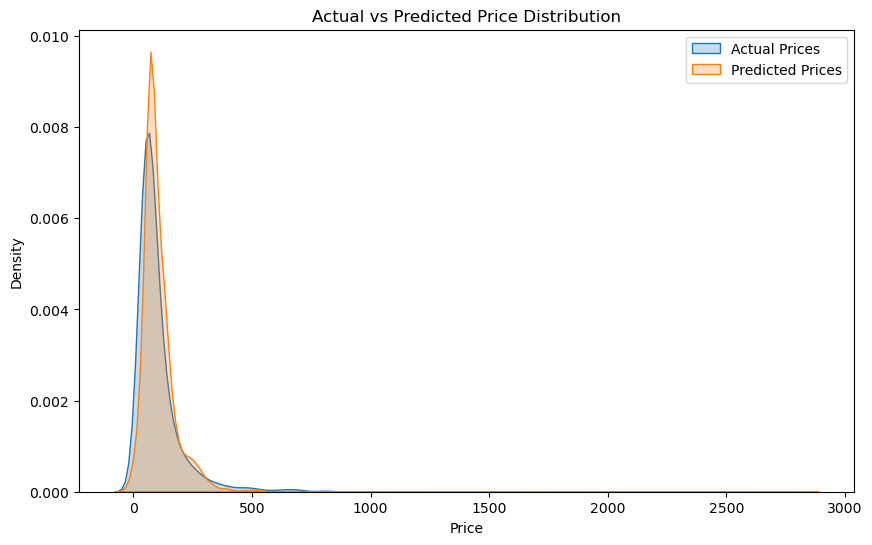

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Prices', fill=True)
sns.kdeplot(y_pred, label='Predicted Prices', fill=True)
plt.xlabel('Price')
plt.title('Actual vs Predicted Price Distribution')
plt.legend()
plt.show()

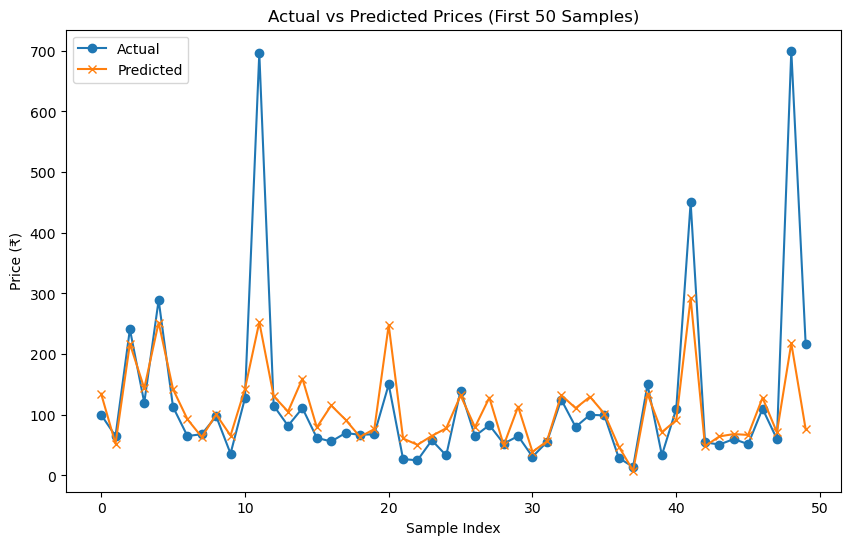

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(comparison['Actual Price'].head(50), label='Actual', marker='o')
plt.plot(comparison['Predicted Price'].head(50), label='Predicted', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Price (₹)')
plt.title('Actual vs Predicted Prices (First 50 Samples)')
plt.legend()
plt.show()

In [18]:
comparison['Error'] = comparison['Actual Price'] - comparison['Predicted Price']
comparison['Absolute Error'] = np.abs(comparison['Error'])
display(comparison)

,Actual Price,Predicted Price,Error,Absolute Error
0,100.00,134.718507,-34.718507,34.718507
1,65.00,52.223017,12.776983,12.776983
2,241.00,217.164129,23.835871,23.835871
3,120.00,143.663251,-23.663251,23.663251
4,289.00,252.093126,36.906874,36.906874
...,...,...,...,...
2529,43.55,70.058939,-26.508939,26.508939
2530,74.00,128.085650,-54.085650,54.085650
2531,110.00,152.837532,-42.837532,42.837532
2532,500.00,184.068770,315.931230,315.931230


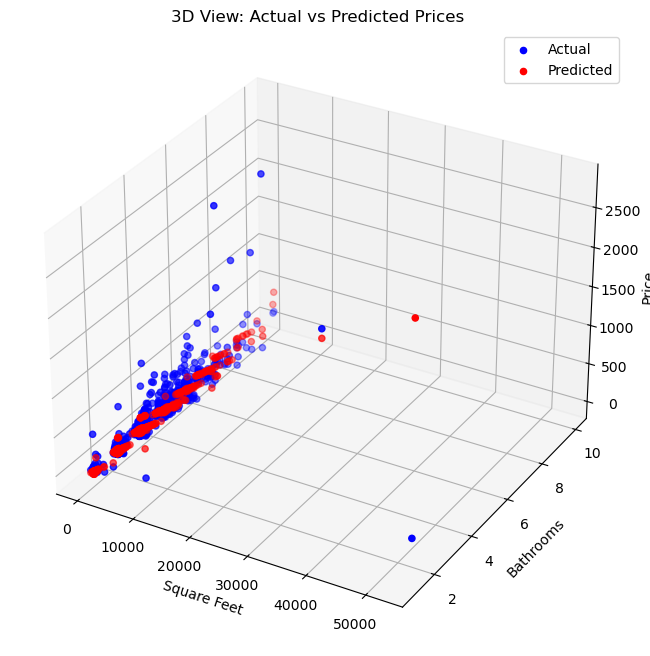

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['total_sqft'], X_test['bath'], y_test, c='blue', label='Actual')
ax.scatter(X_test['total_sqft'], X_test['bath'], y_pred, c='red', label='Predicted')
ax.set_xlabel('Square Feet')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Price')
plt.title('3D View: Actual vs Predicted Prices')
plt.legend()
plt.show()